In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import matplotlib.ticker as ticker
import statsmodels.api as sm

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score, accuracy_score, make_scorer, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance

In [ ]:
# 1- Carregando e explorando os datasets
previous_years = pd.read_csv('D:\\Banco de dados\\air_system\\air_system_previous_years.csv')
present_year = pd.read_csv('D:\\Banco de dados\\air_system\\air_system_present_year.csv')

In [ ]:
previous_years.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
present_year.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [ ]:
previous_years['year'] = 'previous'
present_year['year'] = 'present'
#Adicionei uma coluna em cada conjunto de dados chamada 'year' para poder concatena-los e conseguir distinguir quais informações são dos anos anteriores e quais são do ano atual

In [ ]:
previous_years.info()
present_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 172 entries, class to year
dtypes: int64(1), object(171)
memory usage: 78.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 172 entries, class to year
dtypes: int64(1), object(171)
memory usage: 21.0+ MB


In [ ]:
total_data = pd.concat([previous_years, present_year])

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76000 entries, 0 to 15999
Columns: 172 entries, class to year
dtypes: int64(1), object(171)
memory usage: 100.3+ MB


In [ ]:
total_data.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,year
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,273242,510354,373918,349840,317840,960024,25566,0,0,present
15996,neg,18,0,52,46,8,26,0,0,0,...,44,46,14,2,0,0,0,0,0,present
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,449962,778826,581558,375498,222866,358934,19548,0,0,present
15998,neg,110,na,36,32,0,0,0,0,0,...,210,180,544,1004,1338,74,0,0,0,present
15999,neg,8,0,6,4,2,2,0,0,0,...,10,48,14,42,46,0,0,0,0,present


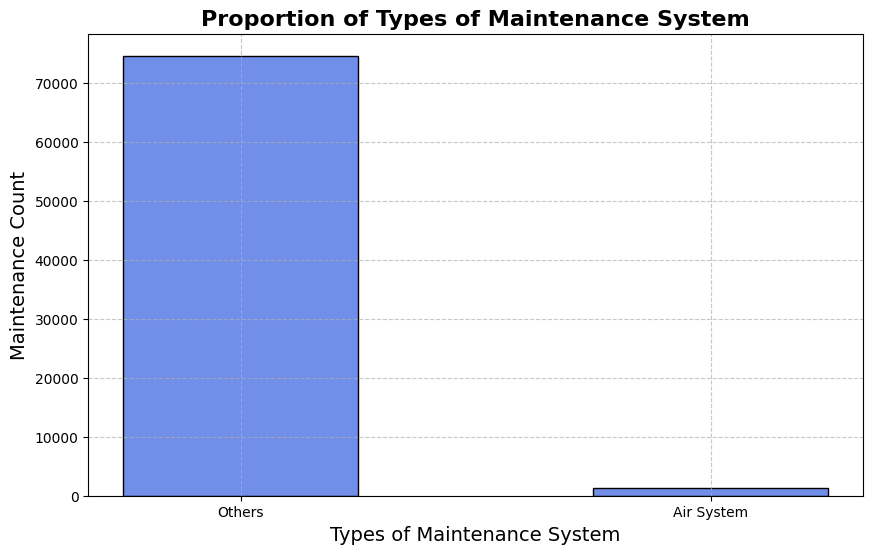

In [ ]:
# 2- Distribuição da variável "Class"
total_data['class'].value_counts()
class_labels = {'neg': 'Others', 'pos': 'Air System'}
plt.figure(figsize=(10, 6))
sns.histplot(data=total_data, x='class', discrete=True, shrink=0.5, color='royalblue', kde=False)
plt.title('Proportion of Types of Maintenance System', fontsize=16, fontweight='bold')
plt.xlabel('Types of Maintenance System', fontsize=14)
plt.ylabel('Maintenance Count', fontsize=14)
plt.xticks(ticks=range(len(class_labels)), labels=[class_labels[label] for label in total_data['class'].unique()])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#De acordo com o gráfico demonstrado acima, acredito precisar realizar um Oversampling futuramente para balancear os dados.

In [ ]:
# 3- Tratando valores nulos e convertendo os tipos dos dados
# convertendo a coluna 'class' para valores numéricos com One-Hot Encoding
total_data = pd.get_dummies(total_data, columns=['class'], drop_first=True)

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76000 entries, 0 to 15999
Columns: 172 entries, aa_000 to class_pos
dtypes: bool(1), int64(1), object(170)
memory usage: 99.8+ MB


In [ ]:
total_data.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,year,class_pos
0,76698,na,2130706438,280,0,0,0,0,0,0,...,721044,469792,339156,157956,73224,0,0,0,previous,False
1,33058,na,0,na,0,0,0,0,0,0,...,293306,245416,133654,81140,97576,1500,0,0,previous,False
2,41040,na,228,100,0,0,0,0,0,0,...,423992,409564,320746,158022,95128,514,0,0,previous,False
3,12,0,70,66,0,10,0,0,0,318,...,58,44,10,0,0,0,4,32,previous,False
4,60874,na,1368,458,0,0,0,0,0,0,...,405298,347188,286954,311560,433954,1218,0,0,previous,False


In [ ]:
total_data.replace("na", np.nan, inplace=True)

In [ ]:
# Transformar as colunas selecionadas em numérico
cols_to_convert = total_data.columns.difference(['year', 'class_pos'])
for col in cols_to_convert:
    total_data[col] = pd.to_numeric(total_data[col], errors='coerce')

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76000 entries, 0 to 15999
Columns: 172 entries, aa_000 to class_pos
dtypes: bool(1), float64(169), int64(1), object(1)
memory usage: 99.8+ MB


In [ ]:
#verificando a porcentagem de valores nulos para cada coluna
na_percentage = total_data.isna().mean() * 100

In [ ]:
na_percentage_df = na_percentage.reset_index()
na_percentage_df.columns = ['Column', 'NA Percentage']

In [ ]:
na_percentage_df = na_percentage_df.sort_values(by='NA Percentage', ascending=True)
print(na_percentage_df)

        Column  NA Percentage
0       aa_000       0.000000
170       year       0.000000
171  class_pos       0.000000
80      bt_000       0.256579
95      cj_000       0.557895
..         ...            ...
112     cr_000      77.226316
75      bo_000      77.248684
76      bp_000      79.553947
77      bq_000      81.188158
78      br_000      82.096053

[172 rows x 2 columns]


In [ ]:
#KNNimputer - para substituir valores nulos
# selecionei todas as colunas, exceto 'class', 'aa_000' e 'year', pois verifiquei que na porcentagem de valores nulos essas colunas estavam com 0
columns_to_impute = total_data.columns.difference(['class_pos', 'aa_000', 'year'])
data_to_impute = total_data[columns_to_impute]

In [ ]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data_to_impute)

In [ ]:
# convertendo o resultado de volta para um DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=columns_to_impute)

In [ ]:
# integrando as colunas imputadas de volta ao dataframe original
total_data.update(imputed_data)
print(total_data.tail(10))

       aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
15990    7256     0.0  3.940000e+02   394.0     0.0     0.0     0.0     0.0   
15991   40262     0.0  4.261414e+08   203.6     0.0     0.0     0.0     0.0   
15992    1298     0.0  2.130706e+09   182.0     0.0     0.0     0.0     0.0   
15993    2146     0.8  1.020000e+02    96.0     0.0     0.0     0.0     0.0   
15994  215220     0.0  8.000000e+00     8.0     0.0     0.0     0.0     0.0   
15995   81852     2.0  2.194000e+03   148.0     0.0     0.0     0.0     0.0   
15996      18     0.8  2.894000e+03  2688.0     0.0     0.0     0.0     0.0   
15997   79636     0.8  2.130706e+09   226.0     0.0     0.0     0.0     0.0   
15998     110    18.0  2.960000e+02   276.0     0.0     0.0     0.0     0.0   
15999       8     0.0  4.500000e+02   396.0     0.0     0.0     0.0     0.0   

       ag_002    ag_003  ...     ee_004     ee_005    ee_006     ee_007  \
15990     0.0       0.0  ...   715856.0   515838.0  368

In [ ]:
#4- Correlação entre as variáveis
# Remover a coluna 'year' antes de calcular a correlação
data_for_correlation = total_data.drop(columns=['year'])

In [ ]:
correlation_matrix = data_for_correlation.corr()

In [ ]:
class_correlation = correlation_matrix['class_pos'].sort_values(ascending=False)
print(class_correlation)

class_pos    1.000000
ci_000       0.414430
bv_000       0.407235
bu_000       0.407235
cq_000       0.407235
               ...   
br_000      -0.013147
bq_000      -0.013274
bm_000      -0.013534
bl_000      -0.016206
cd_000            NaN
Name: class_pos, Length: 171, dtype: float64


In [ ]:
# Selecionar as 10 maiores correlações (excluindo a correlação com a própria 'class_pos')
top_10_correlations = class_correlation[1:11]

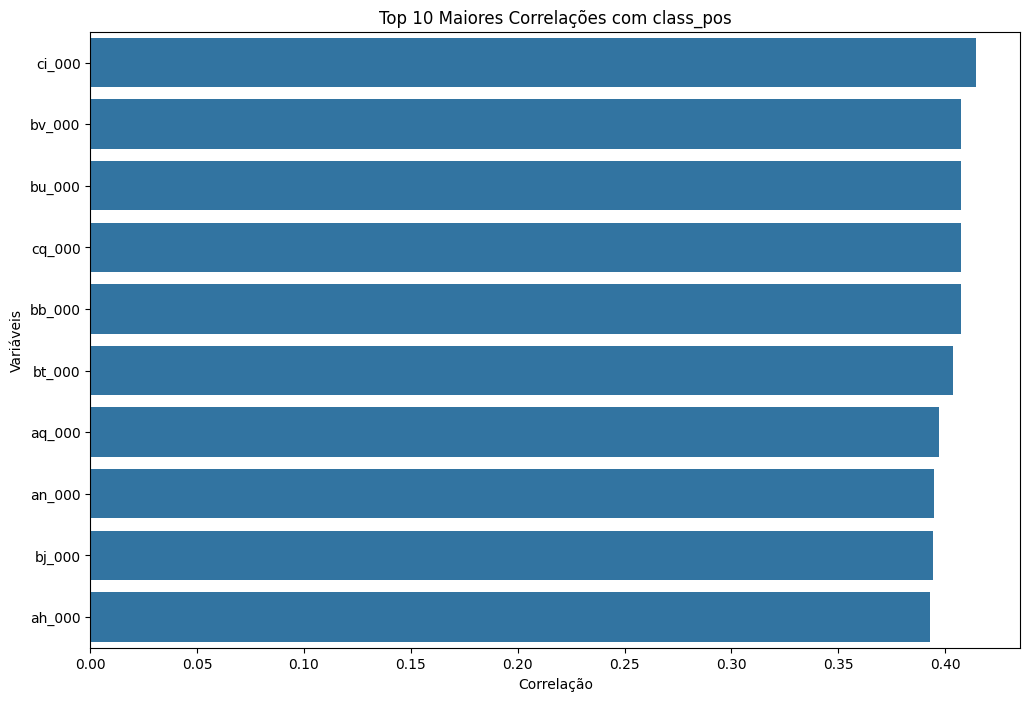

In [ ]:
# Criar um barplot das 11 maiores correlações
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_correlations.values, y=top_10_correlations.index)
plt.title('Top 10 Maiores Correlações com class_pos')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.show()

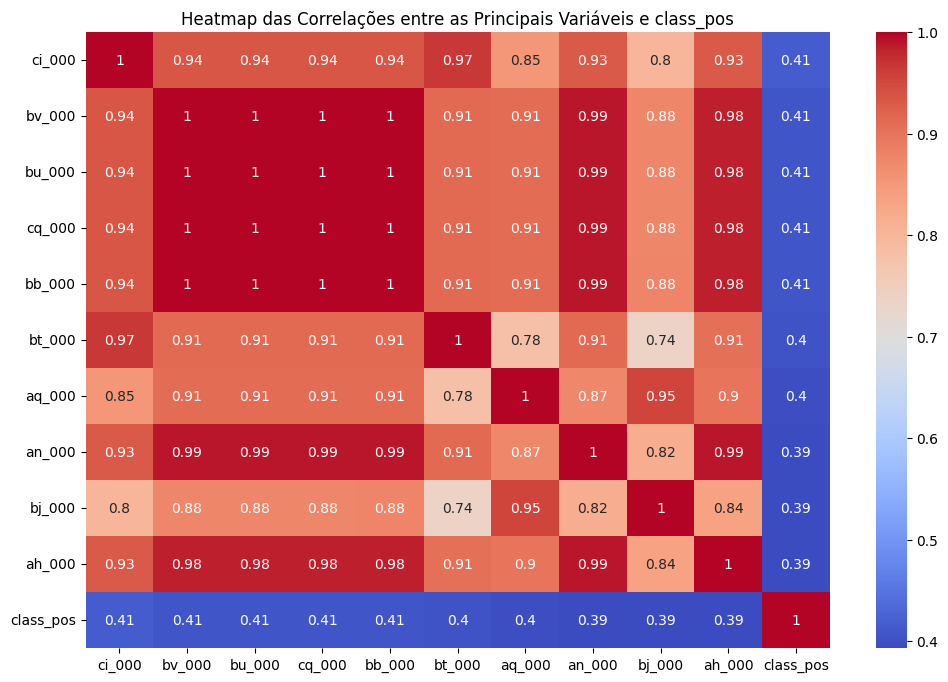

In [ ]:
# Criar um heatmap das correlações entre as 11 variáveis selecionadas
variables_for_heatmap = top_10_correlations.index.tolist() + ['class_pos']
plt.figure(figsize=(12, 8))
sns.heatmap(data_for_correlation[variables_for_heatmap].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap das Correlações entre as Principais Variáveis e class_pos')
plt.show()

In [ ]:
# 5- Observando a frequência das variáveis significativas
selected_variables = [
    'ci_000', 'bv_000', 'bu_000', 'cq_000', 'bb_000', 
    'bt_000', 'aq_000', 'an_000', 'bj_000', 'ah_000',
]

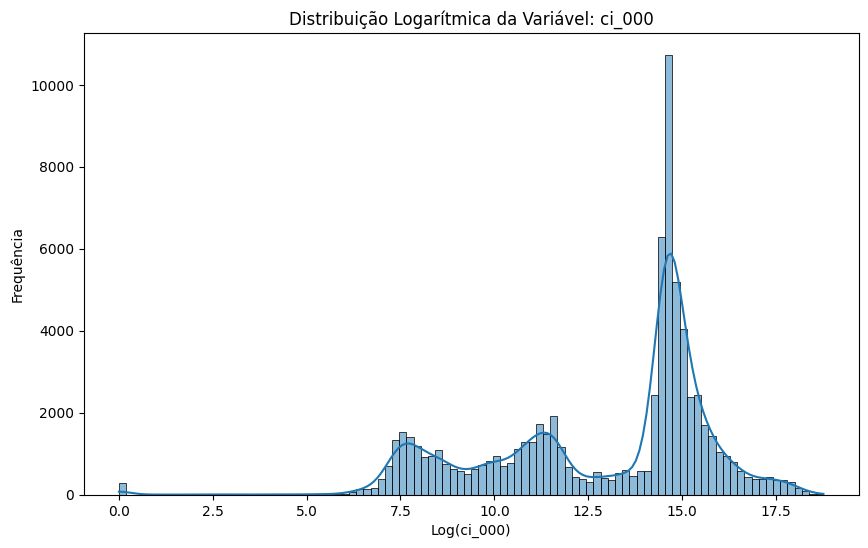

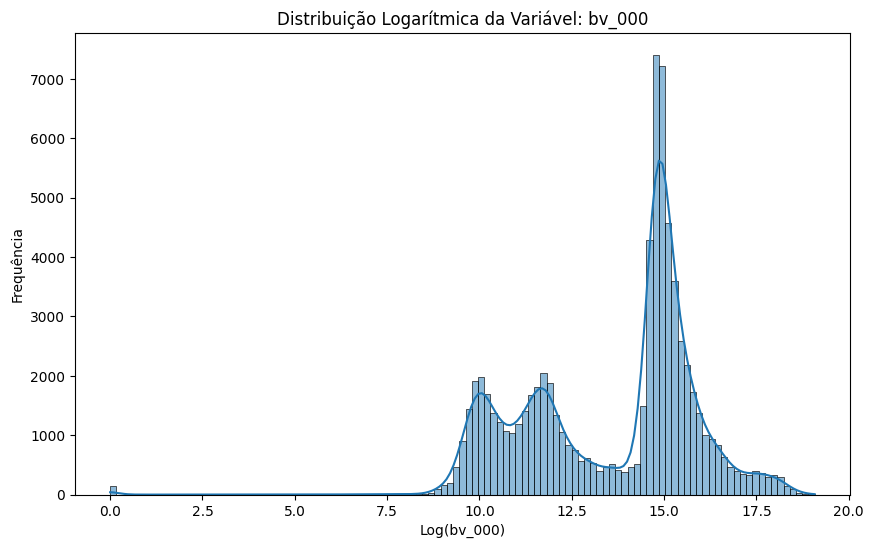

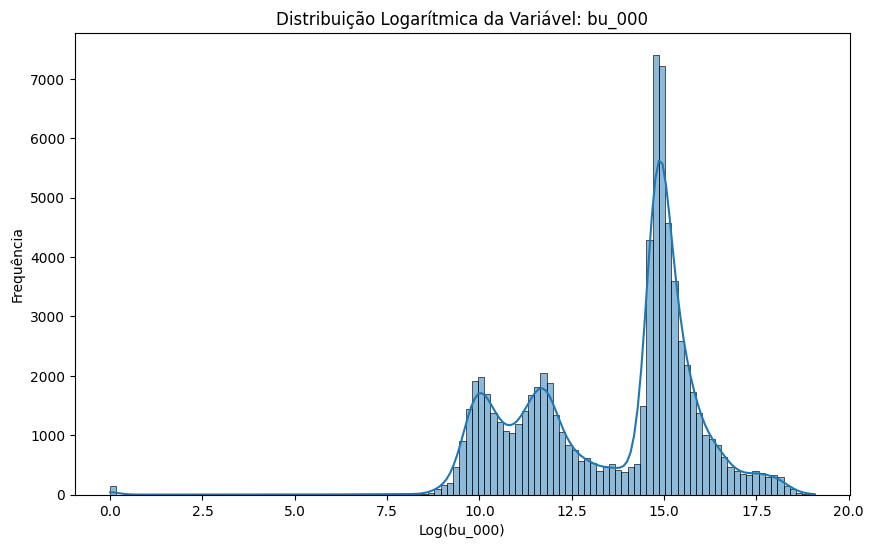

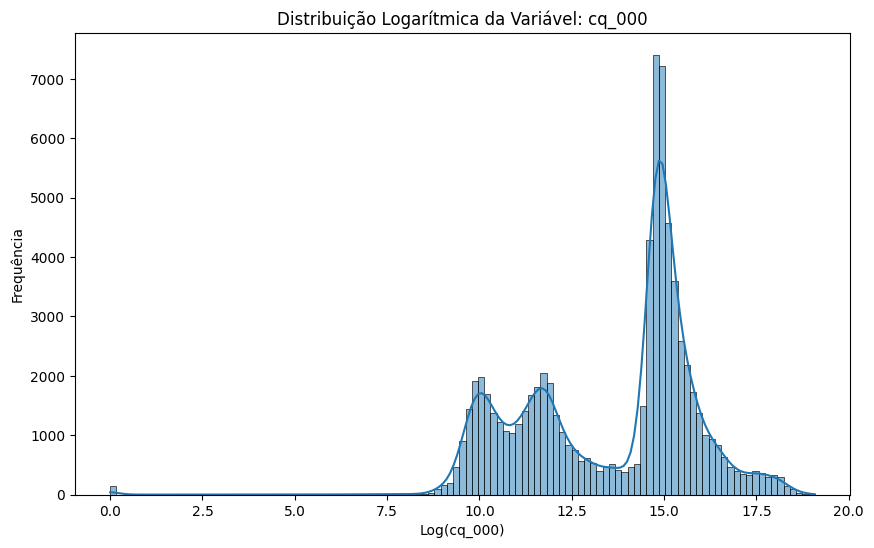

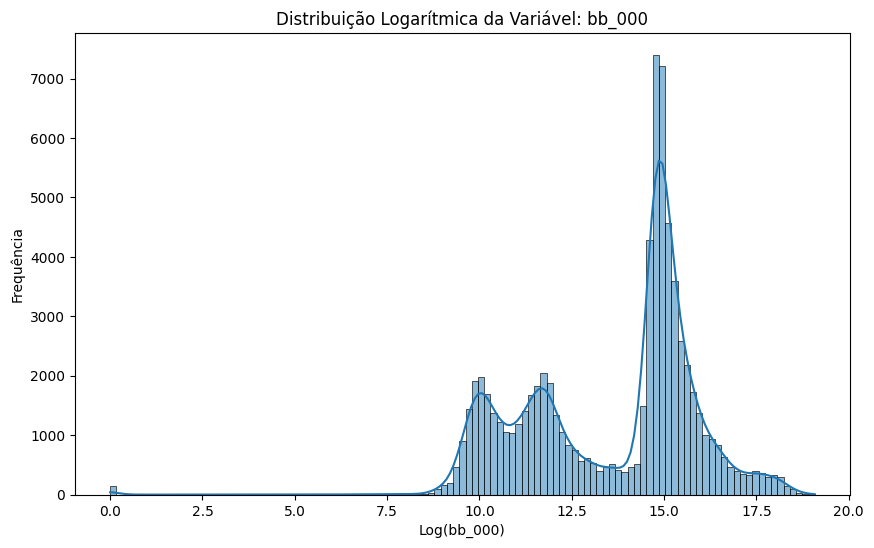

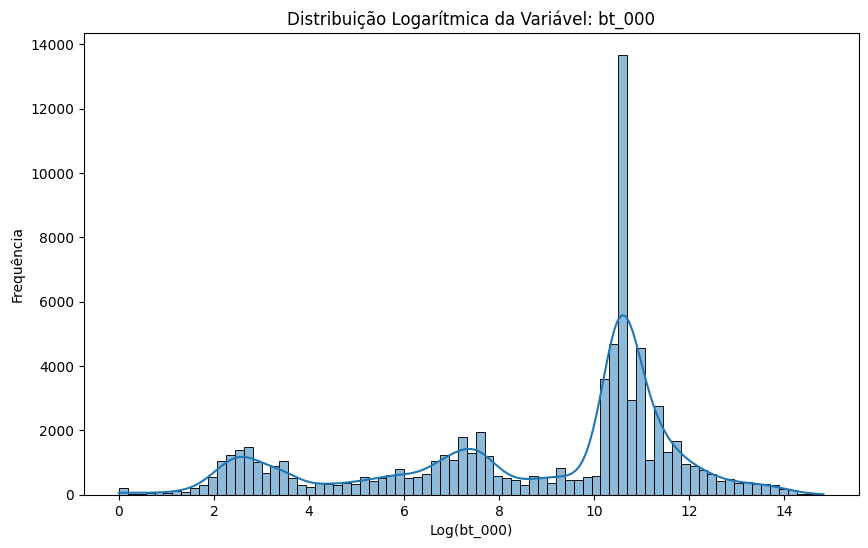

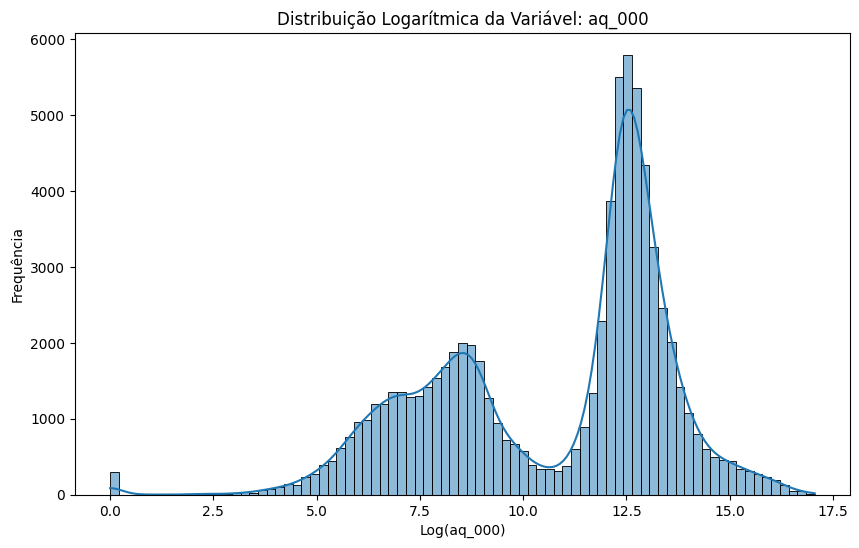

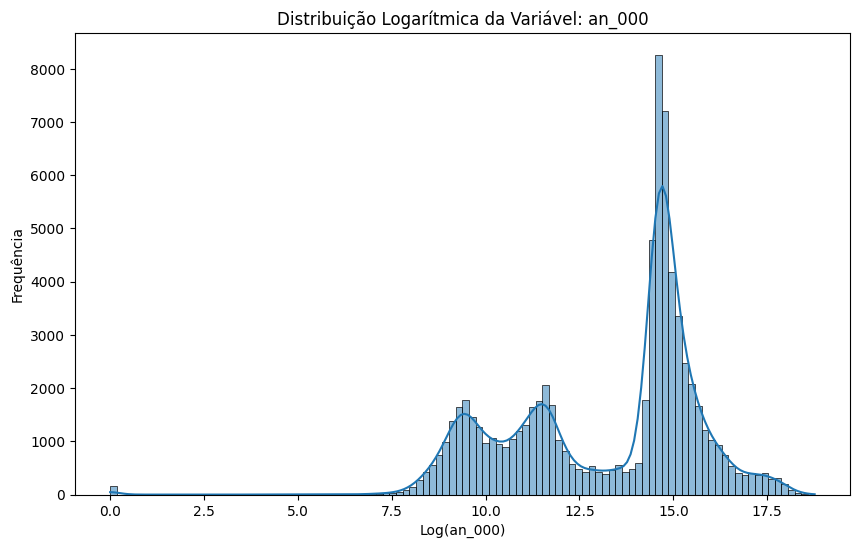

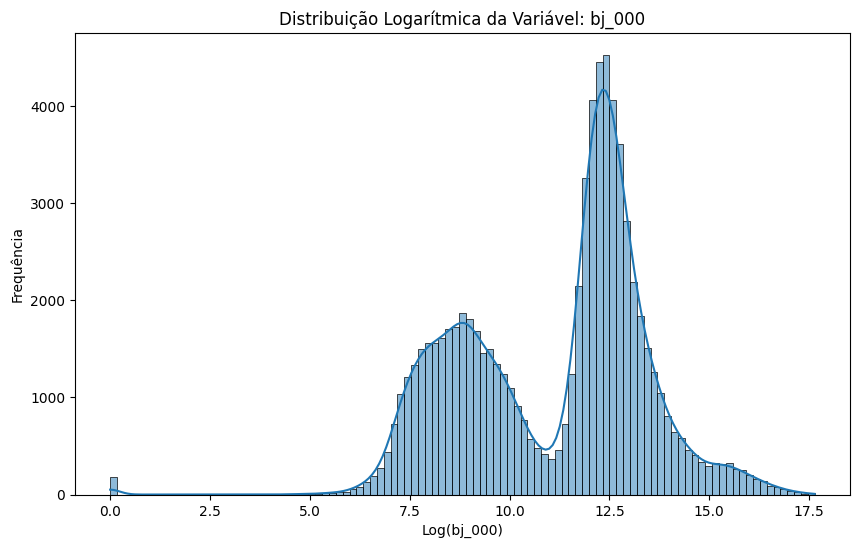

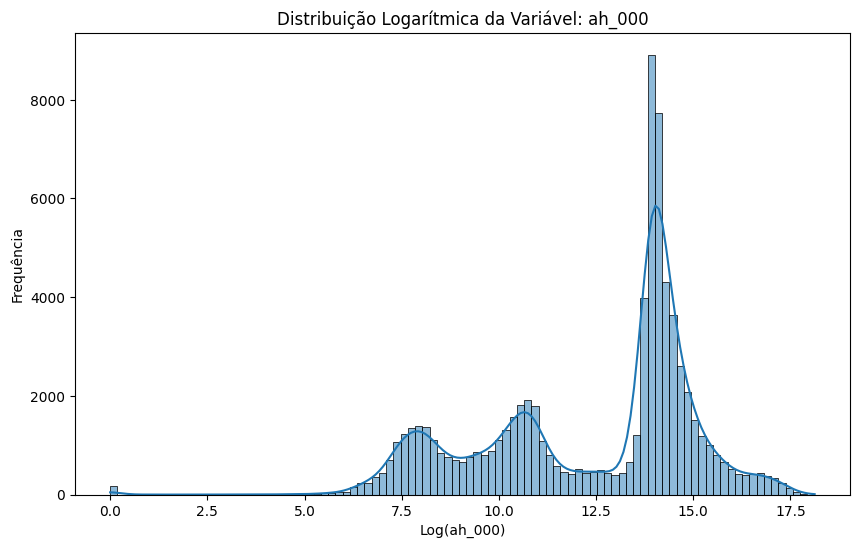

In [ ]:
for variable in selected_variables:
    plt.figure(figsize=(10, 6))
    transformed_data = np.log1p(total_data[variable])  # Aplicando transformação logarítmica para melhorar a visualização
    sns.histplot(transformed_data, kde=True)
    plt.title(f'Distribuição Logarítmica da Variável: {variable}')
    plt.xlabel(f'Log({variable})')
    plt.ylabel('Frequência')
    plt.show()

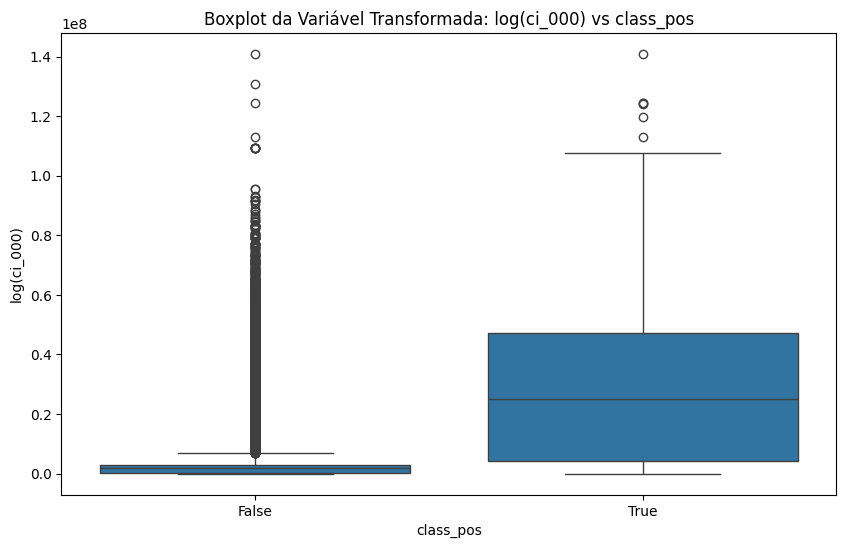

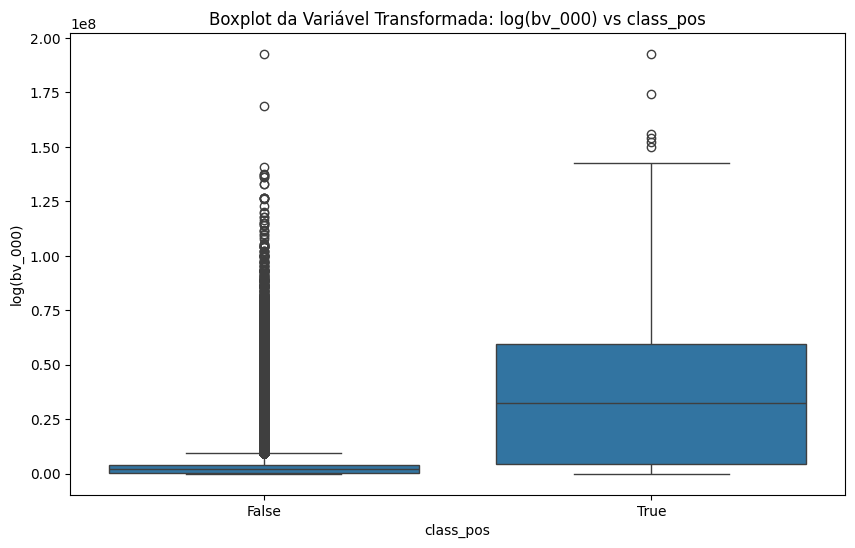

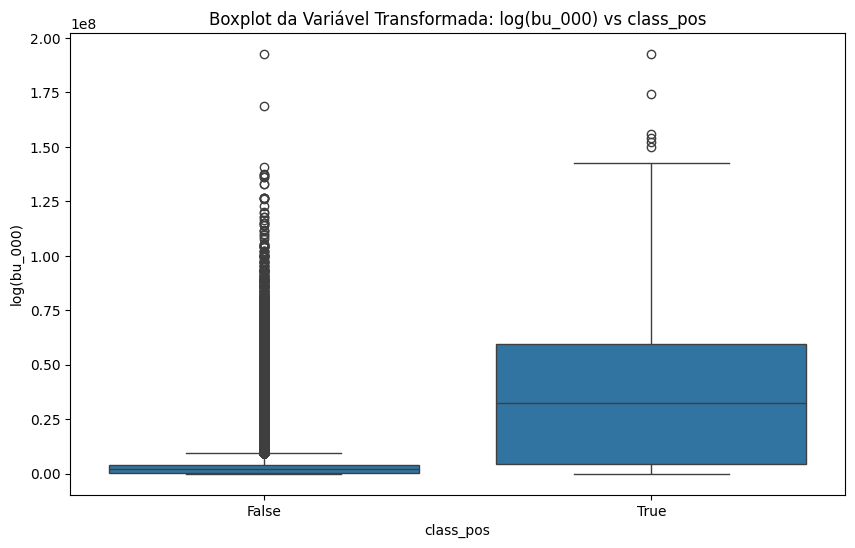

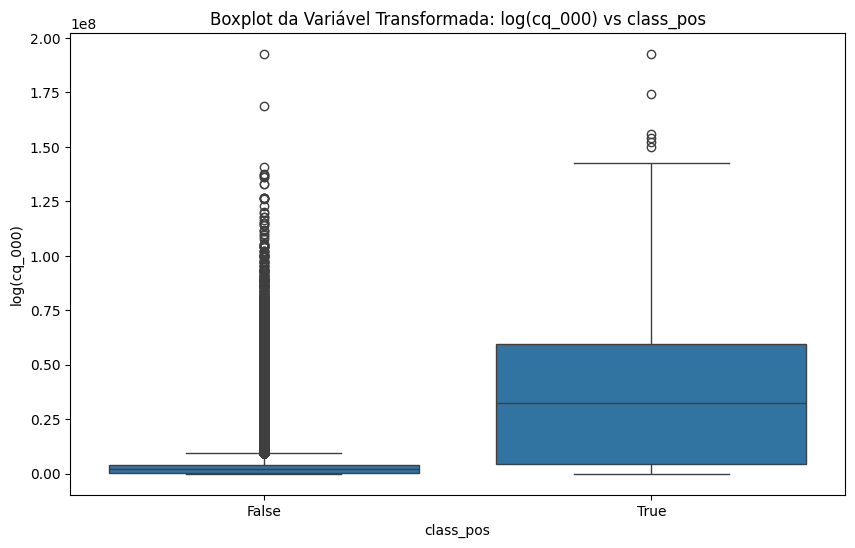

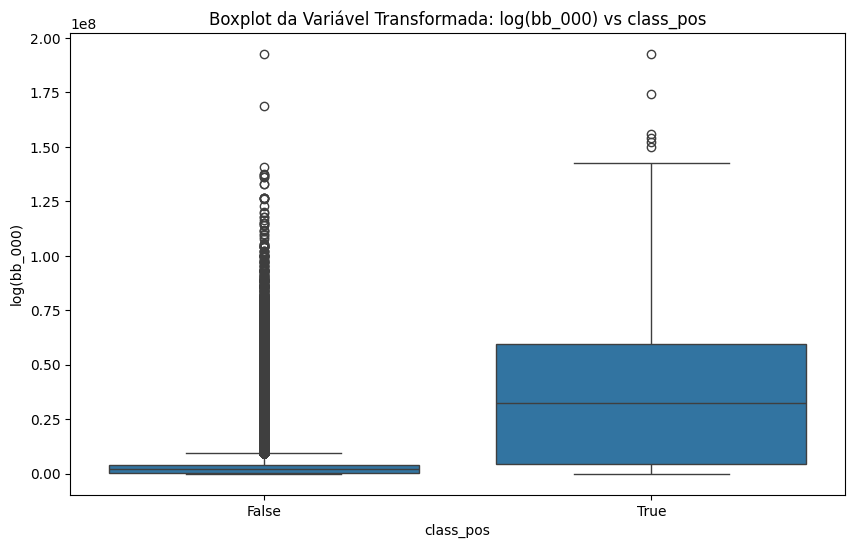

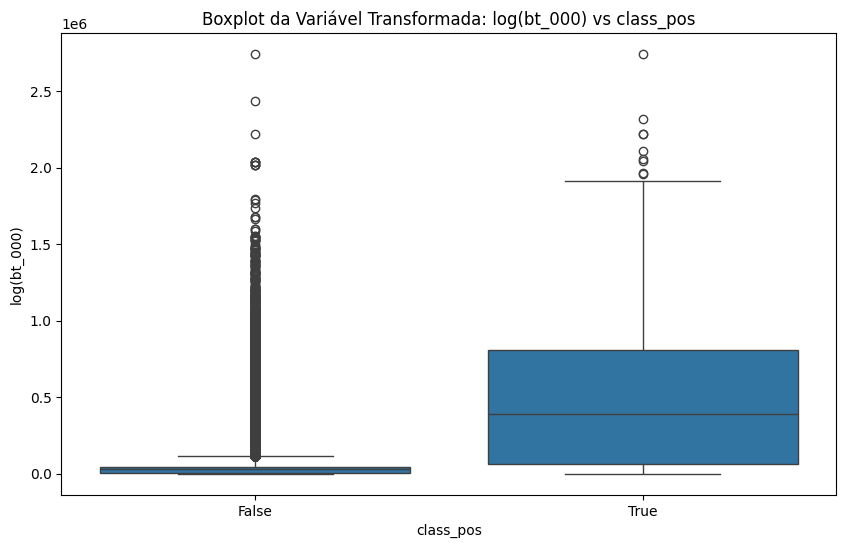

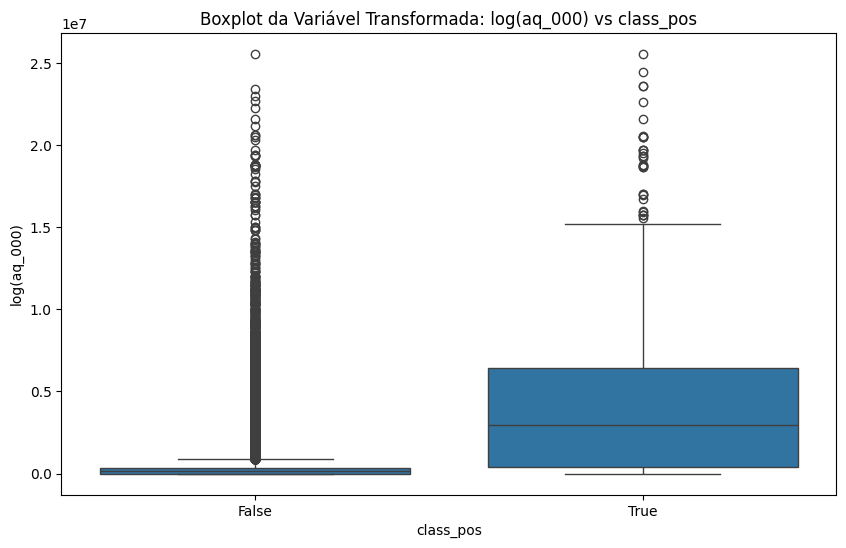

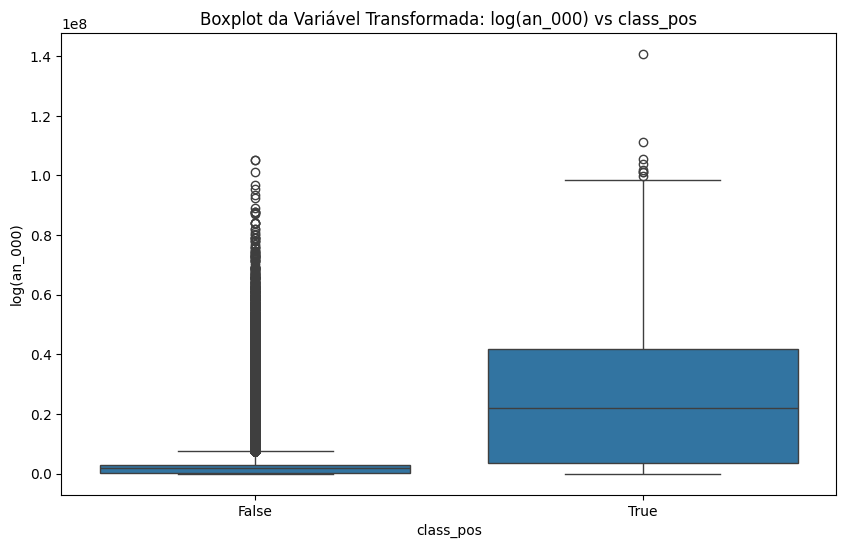

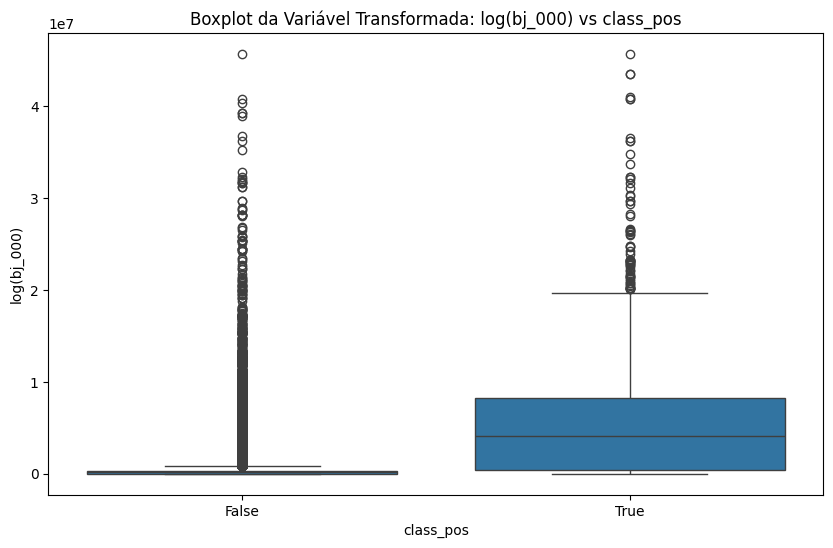

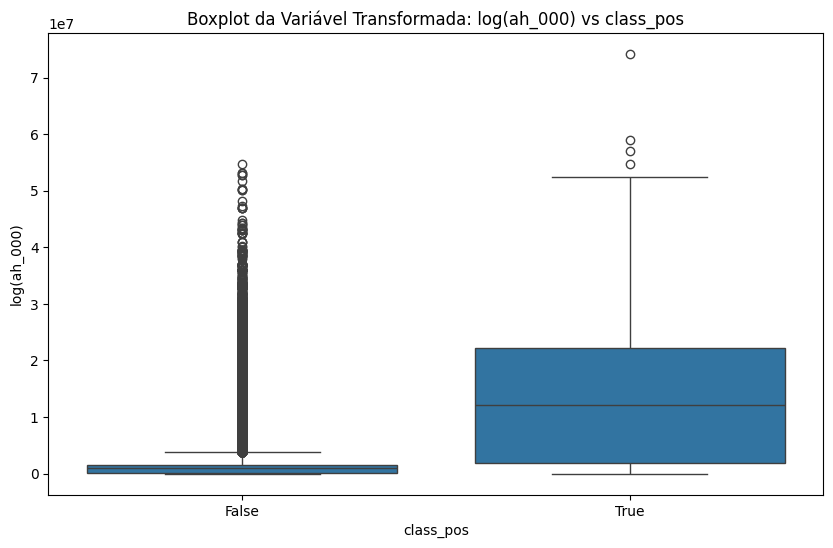

In [ ]:
for variable in selected_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=total_data['class_pos'], y=total_data[variable])
    plt.title(f'Boxplot da Variável Transformada: log({variable}) vs class_pos')
    plt.xlabel('class_pos')
    plt.ylabel(f'log({variable})')
    plt.show()

In [ ]:
# 6- Aplicando SMOTE, PCA e Clustering (K-Means)

In [ ]:
#Visualizar PCA com duas dimenções primeiro
# selecionar todas as variáveis, menos 'class' e 'year'
X_view = total_data.drop(columns=['class_pos', 'year'])

In [ ]:
# Padronizar os dados
scaler = StandardScaler()
X_view_scaled = scaler.fit_transform(X_view)

In [ ]:
# Aplicar PCA
pca_view = PCA(n_components=2)
X_pca_view = pca_view.fit_transform(X_view_scaled)

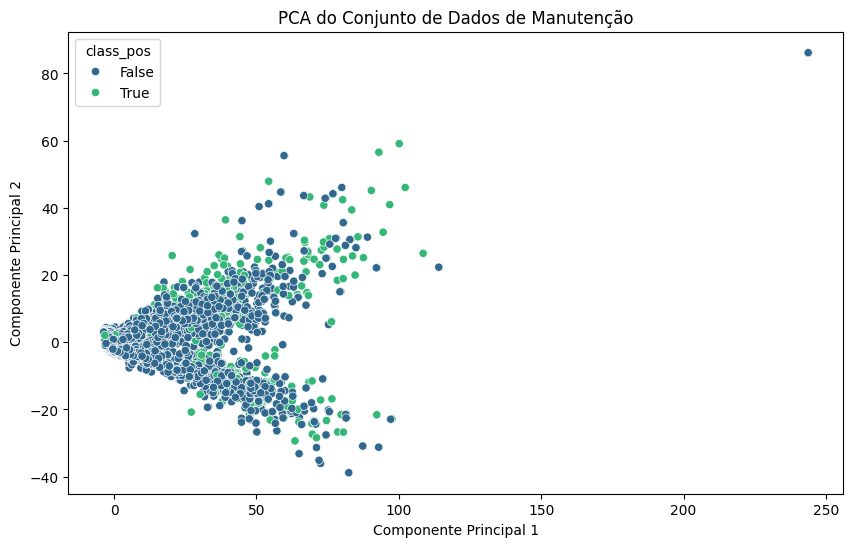

In [ ]:
# Visualizar os componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_view[:, 0], y=X_pca_view[:, 1], hue=total_data['class_pos'], palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA do Conjunto de Dados de Manutenção')
plt.show()

In [ ]:
# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca_view)

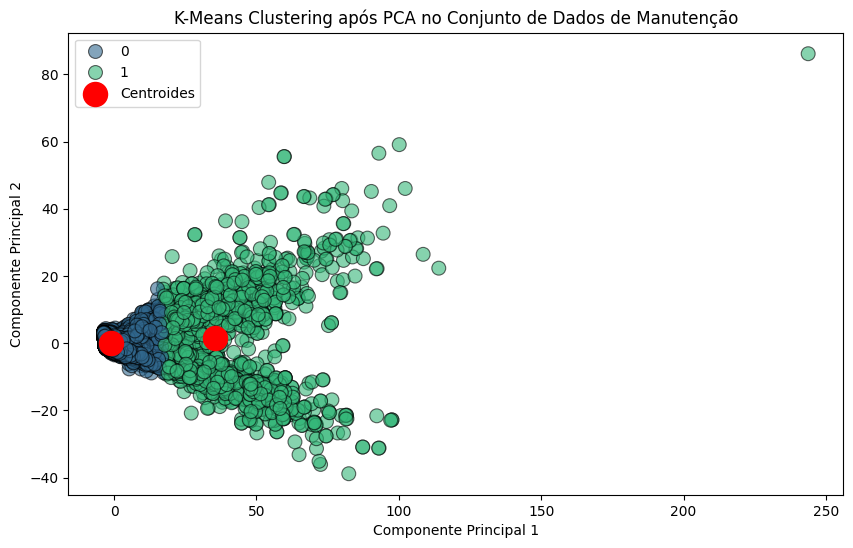

In [ ]:
# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_view[:, 0], y=X_pca_view[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.6, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-Means Clustering após PCA no Conjunto de Dados de Manutenção')
plt.legend()
plt.show()

In [ ]:
# Balancear os dados usando SMOTE
smote = SMOTE(random_state=42)
X = total_data.drop(columns=['class_pos', 'year'])
y = total_data['class_pos']
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Verificar formas
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

Shape of X_resampled: (149250, 170)
Shape of y_resampled: (149250,)


In [ ]:
# Adicionar de volta a coluna 'class_pos' balanceada
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
X_resampled['class_pos'] = y_resampled

<ipython-input-46-558f4b09b918>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_resampled['class_pos'] = y_resampled


In [ ]:
# Padronizar os dados
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled.drop(columns=['class_pos']))

In [ ]:
# Converte de volta para DataFrame para facilitar a manipulação e adicione a coluna 'class_pos'
X_resampled_scaled_df = pd.DataFrame(X_resampled_scaled, columns=X.columns)
X_resampled_scaled_df['class_pos'] = y_resampled

In [ ]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled_df.drop(columns=['class_pos']), X_resampled_scaled_df['class_pos'], test_size=0.2, random_state=42)

In [ ]:
# Aplicar PCA nos dados de treino e transformar os dados de treino e teste
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Verificar forma do PCA
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)
print("Total shape of PCA view:", X_train_pca.shape[0] + X_test_pca.shape[0], X_train_pca.shape[1])

Shape of X_train_pca: (119400, 50)
Shape of X_test_pca: (29850, 50)
Total shape of PCA view: 149250 50


In [ ]:
# Treinar o modelo de Regressão Logística
log_reg_model = LogisticRegression(random_state=42, max_iter=10000)
log_reg_model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
# Prever nos dados de teste
y_pred_log_reg = log_reg_model.predict(X_test_pca)

In [ ]:
# Avaliar o modelo
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.96      0.94     14819
        True       0.96      0.91      0.93     15031

    accuracy                           0.93     29850
   macro avg       0.93      0.93      0.93     29850
weighted avg       0.94      0.93      0.93     29850

Logistic Regression Accuracy: 0.9337018425460637


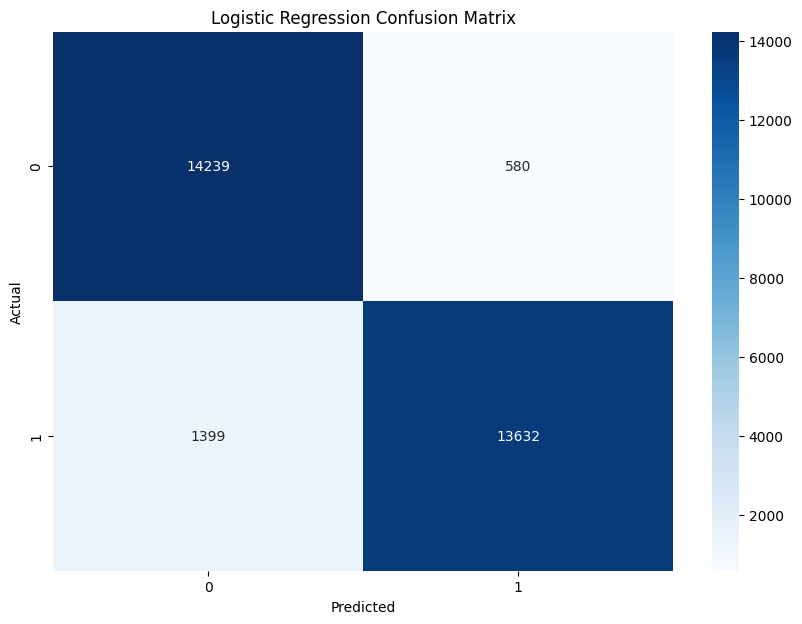

In [ ]:
# Matriz de Confusão
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prever nos dados de teste
y_pred_rf = rf_model.predict(X_test_pca)

In [ ]:
# Avaliar o modelo
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.98      0.99     14819
        True       0.98      1.00      0.99     15031

    accuracy                           0.99     29850
   macro avg       0.99      0.99      0.99     29850
weighted avg       0.99      0.99      0.99     29850

Random Forest Accuracy: 0.9870351758793969


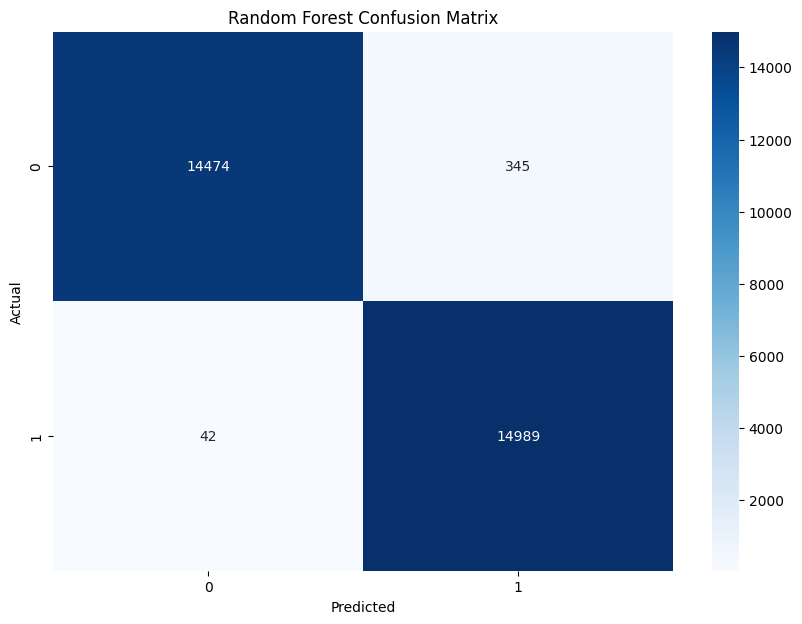

In [ ]:
# Matriz de Confusão
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Importância das Características
importances_rf = rf_model.feature_importances_
features_rf = pd.DataFrame({'Feature': range(X_train_pca.shape[1]), 'Importance': importances_rf})
features_rf = features_rf.sort_values(by='Importance', ascending=False)
print(features_rf)

    Feature  Importance
44       44    0.189612
0         0    0.134556
1         1    0.086715
43       43    0.059084
4         4    0.046541
40       40    0.044664
5         5    0.029531
39       39    0.029261
3         3    0.025901
48       48    0.023170
9         9    0.020685
46       46    0.017576
47       47    0.017248
8         8    0.017169
23       23    0.015246
25       25    0.014783
2         2    0.014104
41       41    0.013308
42       42    0.013278
45       45    0.012856
10       10    0.011990
49       49    0.009974
6         6    0.009971
12       12    0.009719
26       26    0.008988
38       38    0.008058
7         7    0.007749
36       36    0.007036
11       11    0.006302
20       20    0.005990
24       24    0.005905
35       35    0.005842
30       30    0.005557
32       32    0.005400
37       37    0.005229
22       22    0.005220
33       33    0.005206
34       34    0.004961
28       28    0.004729
16       16    0.004577
19       19    0

In [ ]:
# Treinar o modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Prever nos dados de teste
y_pred_xgb = xgb_model.predict(X_test_pca)

In [ ]:
# Avaliar o modelo
print("Relatório de Classificação - XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Relatório de Classificação - XGBoost
              precision    recall  f1-score   support

       False       1.00      0.98      0.99     14819
        True       0.98      1.00      0.99     15031

    accuracy                           0.99     29850
   macro avg       0.99      0.99      0.99     29850
weighted avg       0.99      0.99      0.99     29850

Accuracy: 0.9877386934673367


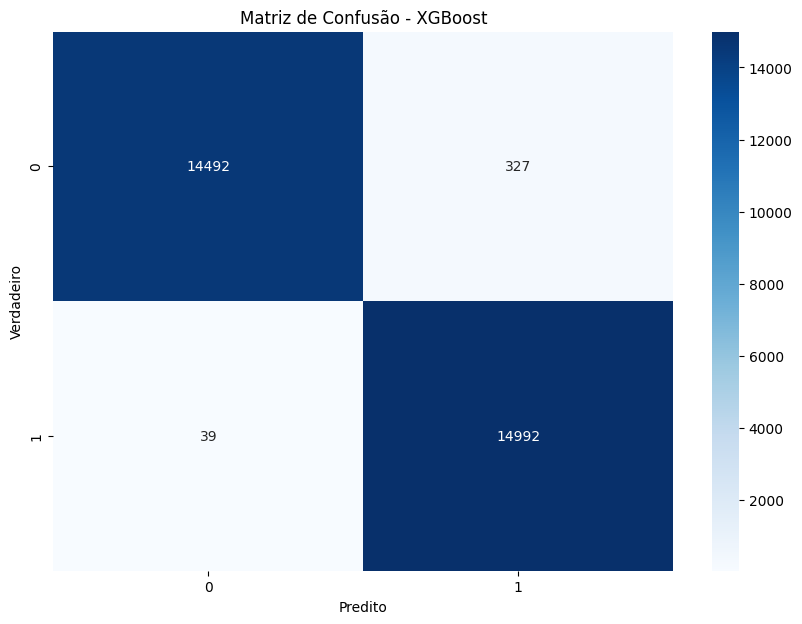

In [ ]:
# Matriz de Confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [ ]:
# Importância das Características
importances_xgb = xgb_model.feature_importances_
features_xgb = pd.DataFrame({'Feature': range(X_train_pca.shape[1]), 'Importance': importances_xgb})
features_xgb = features_xgb.sort_values(by='Importance', ascending=False)
print(features_xgb)

    Feature  Importance
0         0    0.262301
44       44    0.199017
1         1    0.036142
46       46    0.032505
38       38    0.029406
48       48    0.025327
43       43    0.019486
47       47    0.019147
41       41    0.017258
3         3    0.015886
4         4    0.015822
8         8    0.015105
7         7    0.014249
12       12    0.012683
2         2    0.012259
10       10    0.011370
5         5    0.010789
49       49    0.010399
30       30    0.010383
45       45    0.010344
11       11    0.010066
17       17    0.009925
31       31    0.009432
23       23    0.009273
39       39    0.009036
9         9    0.008809
21       21    0.008746
24       24    0.008430
36       36    0.008253
19       19    0.007953
26       26    0.007674
29       29    0.007599
42       42    0.007527
33       33    0.007082
6         6    0.006968
15       15    0.006809
35       35    0.006783
32       32    0.006767
25       25    0.006722
27       27    0.006639
37       37    0

In [ ]:
# Obter as cargas dos componentes principais
pca_loadings = pca.components_

In [ ]:
# Criar um DataFrame para facilitar a visualização
loadings_df = pd.DataFrame(pca_loadings.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X_train.columns)

In [ ]:
# Usando as importâncias das características dos modelos anteriores
important_components_indices = [0, 44, 1]  # Índices dos componentes principais mais importantes
important_components = [f'PC{i+1}' for i in important_components_indices]

In [ ]:
# Visualizar as cargas dos componentes principais mais importantes
important_loadings = loadings_df[important_components]

In [ ]:
print("Cargas dos Componentes Principais mais Importantes:")
print(important_loadings)

Cargas dos Componentes Principais mais Importantes:
             PC1      PC45       PC2
aa_000  0.056608  0.732766 -0.005234
ab_000  0.015014  0.100037  0.023998
ac_000  0.012455 -0.068835 -0.005463
ad_000 -0.000303  0.000112 -0.000063
ae_000  0.003382 -0.012156  0.021581
...          ...       ...       ...
ee_007  0.078127 -0.011697  0.058690
ee_008  0.066409 -0.019058 -0.162012
ee_009  0.037052  0.017502 -0.111093
ef_000  0.004830  0.050062  0.023125
eg_000  0.000972  0.035396  0.016636

[170 rows x 3 columns]


In [ ]:
# Ajustar configurações de exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Identificar as variáveis originais mais importantes
for component in important_components:
    top_features = important_loadings[component].abs().sort_values(ascending=False).head(10)
    print(f'\nVariáveis mais importantes para {component}:')
    print(top_features)


Variáveis mais importantes para PC1:
bx_000    0.128494
cc_000    0.128484
by_000    0.126855
ba_003    0.124106
cs_005    0.124001
ba_004    0.122959
ci_000    0.122958
ba_002    0.122287
ag_005    0.122074
dc_000    0.121757
Name: PC1, dtype: float64

Variáveis mais importantes para PC45:
aa_000    0.732766
dj_000    0.271634
dk_000    0.250086
ar_000    0.174189
cy_000    0.153374
ay_001    0.132367
cs_001    0.128831
az_009    0.117458
dy_000    0.102032
ab_000    0.100037
Name: PC45, dtype: float64

Variáveis mais importantes para PC2:
ag_003    0.200934
ag_004    0.186026
cn_002    0.183659
cn_001    0.183587
ay_006    0.182259
am_0      0.177399
al_000    0.176509
ag_006    0.174072
ag_002    0.173801
ag_007    0.162572
Name: PC2, dtype: float64
